In [1]:
# importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')



In [2]:
#Load Dataset
import kagglehub

path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/students-performance-in-exams


In [3]:
#find the exact .csv path and load it:
df = pd.read_csv(f"{path}/StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#Check Dataset Info
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


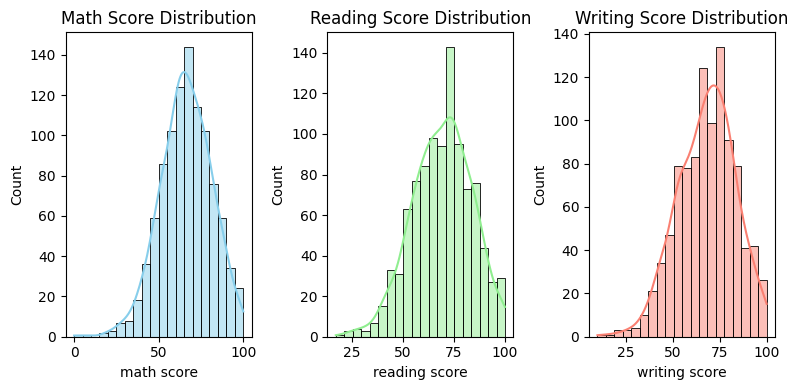

In [5]:
# Visualize the Distribution of Scores
plt.figure(figsize=(8, 4))

# Math Score Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True, bins=20, color='skyblue')
plt.title('Math Score Distribution')

# Reading Score Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True, bins=20, color='lightgreen')
plt.title('Reading Score Distribution')

# Writing Score Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True, bins=20, color='salmon')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()


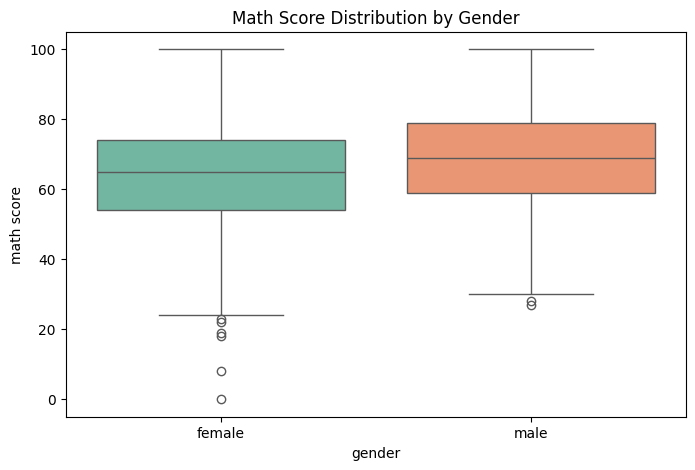

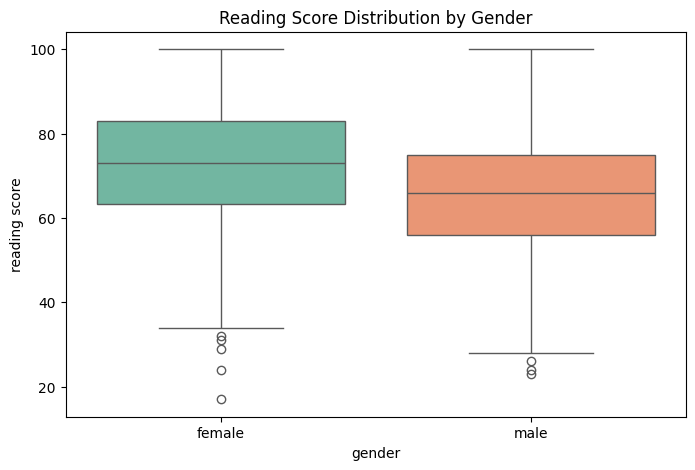

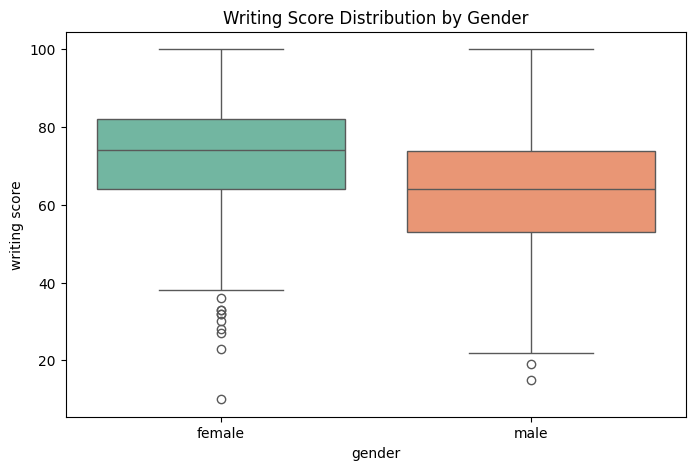

In [6]:
# Visualize Scores by gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='gender', y='math score', palette='Set2')
plt.title('Math Score Distribution by Gender')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='gender', y='reading score', palette='Set2')
plt.title('Reading Score Distribution by Gender')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='gender', y='writing score', palette='Set2')
plt.title('Writing Score Distribution by Gender')
plt.show()


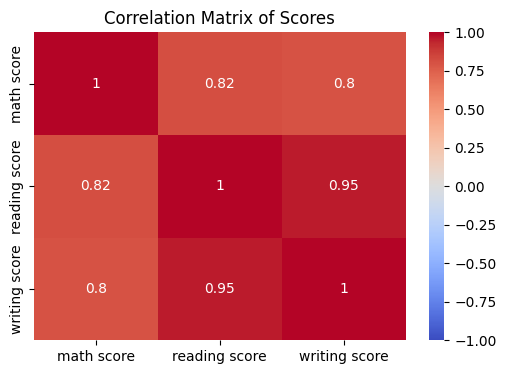

In [7]:
# Visualize the Correlation Between Scores
plt.figure(figsize=(6, 4))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Scores')
plt.show()


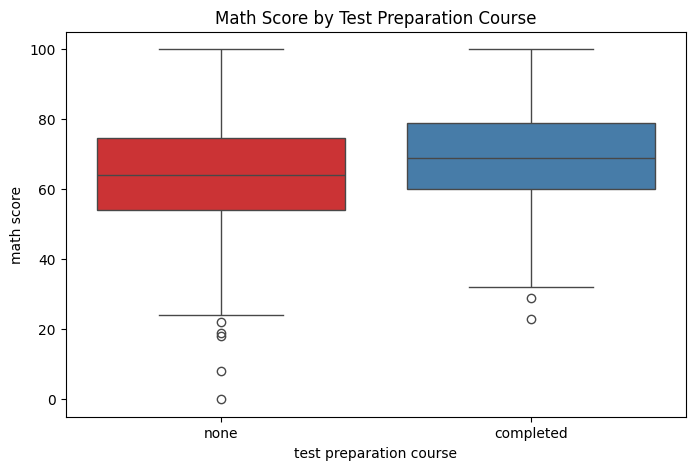

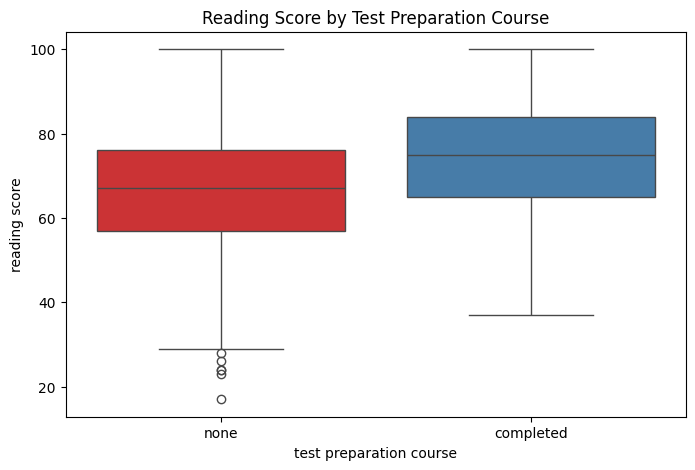

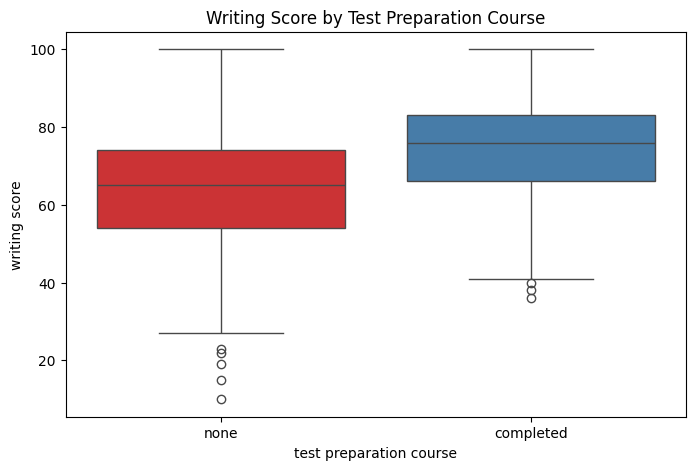

In [8]:
#Analyze the Impact of Test Preparation Course
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='test preparation course', y='math score', palette='Set1')
plt.title('Math Score by Test Preparation Course')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='test preparation course', y='reading score', palette='Set1')
plt.title('Reading Score by Test Preparation Course')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='test preparation course', y='writing score', palette='Set1')
plt.title('Writing Score by Test Preparation Course')
plt.show()


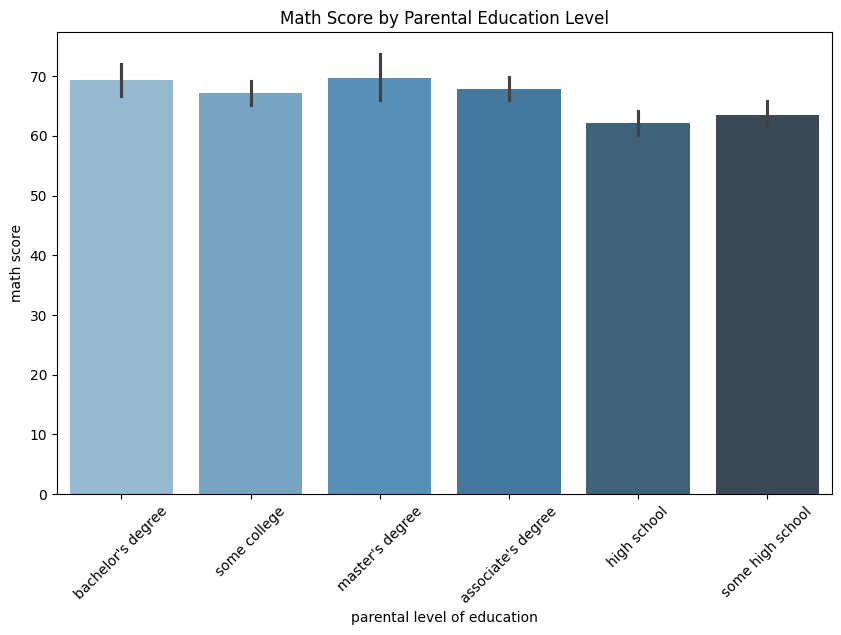

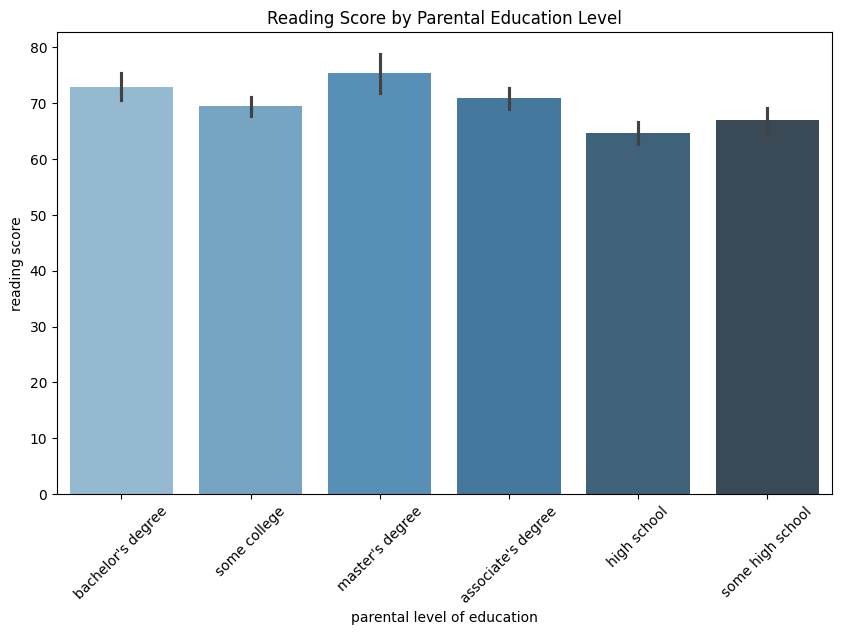

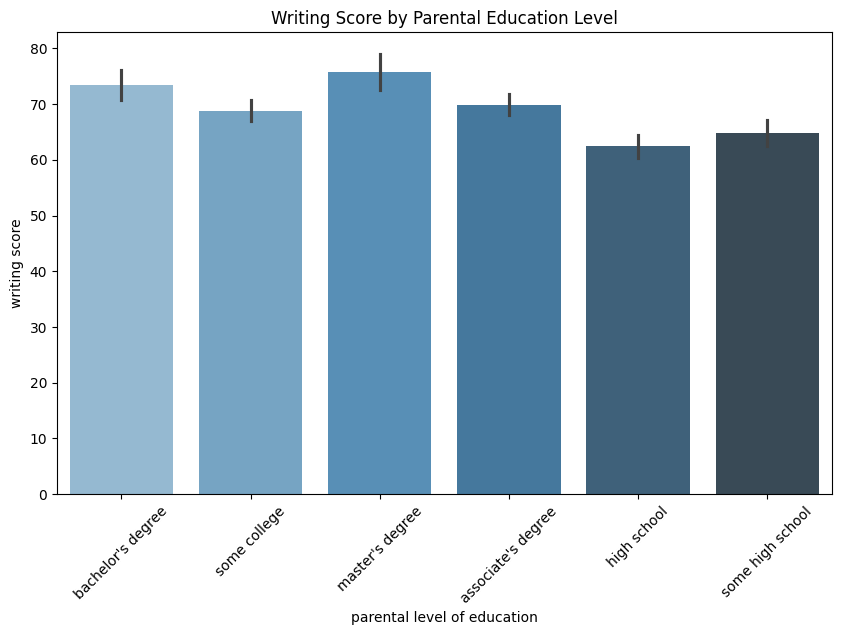

In [9]:
# Explore Parental Education Level
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='parental level of education', y='math score', palette='Blues_d')
plt.title('Math Score by Parental Education Level')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='parental level of education', y='reading score', palette='Blues_d')
plt.title('Reading Score by Parental Education Level')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='parental level of education', y='writing score', palette='Blues_d')
plt.title('Writing Score by Parental Education Level')
plt.xticks(rotation=45)
plt.show()


In [10]:
#model Building
#  Step 1: Create average score and binary pass/fail column
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['pass'] = np.where(df['average_score'] >= 50, 1, 0)  # 1 = Pass, 0 = Fail

# Step 2: Encode categorical variables using One-Hot Encoding
df_encoded = pd.get_dummies(df.drop(['average_score'], axis=1), drop_first=True)

#  Step 3: Split features and target
X = df_encoded.drop('pass', axis=1)
y = df_encoded['pass']

# Step 4: Train-test split (80/20) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#  Show result shape confirmation
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))

X_train: (800, 15)
X_test: (200, 15)
y_train distribution:
 pass
1    0.8975
0    0.1025
Name: proportion, dtype: float64
y_test distribution:
 pass
1    0.895
0    0.105
Name: proportion, dtype: float64


In [11]:
from imblearn.over_sampling import SMOTE
#Oversampling with SMOTE (only)
# Step 1: Install imbalanced-learn (if not already)
!pip install imbalanced-learn --quiet

# Step 2: Import SMOTE
from imblearn.over_sampling import SMOTE

# Step 3: Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Step 4: Check class distribution before and after
print("Before Oversampling:")
print(y_train.value_counts())

print("\nAfter Oversampling:")
print(pd.Series(y_train_oversampled).value_counts())

# Step 5: Check shape
print("\nOriginal X_train shape:", X_train.shape)
print("Oversampled X_train shape:", X_train_oversampled.shape)


Before Oversampling:
pass
1    718
0     82
Name: count, dtype: int64

After Oversampling:
pass
1    718
0    718
Name: count, dtype: int64

Original X_train shape: (800, 15)
Oversampled X_train shape: (1436, 15)


In [12]:
#baseline
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", acc_baseline)

Baseline Accuracy: 0.8975


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline for Random Forest with scaling
clf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))


In [14]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1)

# Output the results
print("Cross-validation Accuracy Scores: ", cv_scores)
print("Mean Cross-validation Accuracy: ", cv_scores.mean())

Cross-validation Accuracy Scores:  [0.98125 0.98125 0.99375 0.9875  0.98125]
Mean Cross-validation Accuracy:  0.985


In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {
     "randomforestclassifier__n_estimators": [25, 50, 100],
    "randomforestclassifier__max_depth": list(range(10, 50, 10))
}

param_grid

{'randomforestclassifier__n_estimators': [25, 50, 100],
 'randomforestclassifier__max_depth': [10, 20, 30, 40]}

In [16]:
#Grid Search
model = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
#fit the model
model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [10, 20, 30, 40],
                         'randomforestclassifier__n_estimators': [25, 50, 100]})

In [17]:
#Get-cross-validation result from Grid search
CV_results=pd.DataFrame(model.cv_results_)
CV_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.191426,0.078346,0.016157,0.007423,10,25,"{'randomforestclassifier__max_depth': 10, 'ran...",0.98125,0.97500,0.98750,0.98125,0.97500,0.98000,0.004677,9
1,0.237780,0.073196,0.017826,0.005345,10,50,"{'randomforestclassifier__max_depth': 10, 'ran...",0.98750,0.97500,0.99375,0.98750,0.97500,0.98375,0.007500,4
2,0.739332,0.267389,0.028802,0.013786,10,100,"{'randomforestclassifier__max_depth': 10, 'ran...",0.98125,0.98125,0.99375,0.98750,0.97500,0.98375,0.006374,4
3,0.368506,0.075450,0.046616,0.014139,20,25,"{'randomforestclassifier__max_depth': 20, 'ran...",0.98125,0.97500,0.98750,0.98125,0.97500,0.98000,0.004677,9
4,0.582085,0.033373,0.041134,0.008528,20,50,"{'randomforestclassifier__max_depth': 20, 'ran...",0.98750,0.97500,0.99375,0.98750,0.97500,0.98375,0.007500,4
5,0.743600,0.112610,0.032777,0.015137,20,100,"{'randomforestclassifier__max_depth': 20, 'ran...",0.98125,0.98125,0.99375,0.98750,0.98125,0.98500,0.005000,1
6,0.159916,0.059819,0.017477,0.008527,30,25,"{'randomforestclassifier__max_depth': 30, 'ran...",0.98125,0.97500,0.98750,0.98125,0.97500,0.98000,0.004677,9
7,0.374711,0.057830,0.024340,0.008615,30,50,"{'randomforestclassifier__max_depth': 30, 'ran...",0.98750,0.97500,0.99375,0.98750,0.97500,0.98375,0.007500,4
8,0.846629,0.157883,0.054765,0.017617,30,100,"{'randomforestclassifier__max_depth': 30, 'ran...",0.98125,0.98125,0.99375,0.98750,0.98125,0.98500,0.005000,1
9,0.207642,0.039975,0.021993,0.008935,40,25,"{'randomforestclassifier__max_depth': 40, 'ran...",0.98125,0.97500,0.98750,0.98125,0.97500,0.98000,0.004677,9


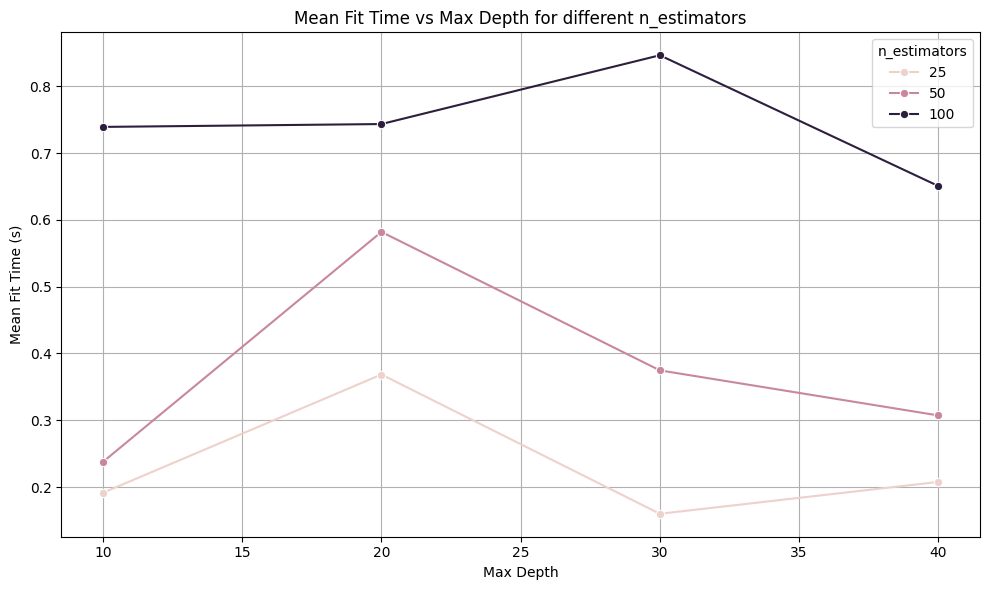

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert depth and estimator columns to int for proper sorting (if needed)
CV_results["param_randomforestclassifier__max_depth"] = CV_results["param_randomforestclassifier__max_depth"].astype(int)
CV_results["param_randomforestclassifier__n_estimators"] = CV_results["param_randomforestclassifier__n_estimators"].astype(int)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=CV_results,
    x="param_randomforestclassifier__max_depth",
    y="mean_fit_time",
    hue="param_randomforestclassifier__n_estimators",
    marker="o"
)

plt.title("Mean Fit Time vs Max Depth for different n_estimators")
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time (s)")
plt.legend(title="n_estimators")
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
#Evualate BEST Hyparameter
model.best_params_


{'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__n_estimators': 100}

In [25]:
#Extract score
acc_train=model.score(X_train,y_train)
acc_test=model.score(X_test,y_test)
print("Training Accuracy:", acc_train)
print("Testing Accuracy:", acc_test)


Training Accuracy: 1.0
Testing Accuracy: 0.985


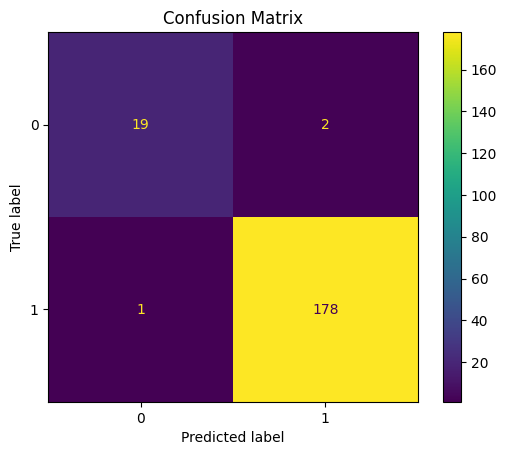

In [28]:
#Plot Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

In [29]:
from sklearn.metrics import f1_score

# Predict on training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate F1 Score
f1_train = f1_score(y_train, y_pred_train, average='weighted')  # or 'macro' if you prefer equal weighting
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Print F1 scores
print("F1 Score (Train):", f1_train)
print("F1 Score (Test):", f1_test)


F1 Score (Train): 1.0
F1 Score (Test): 0.9848379645356343


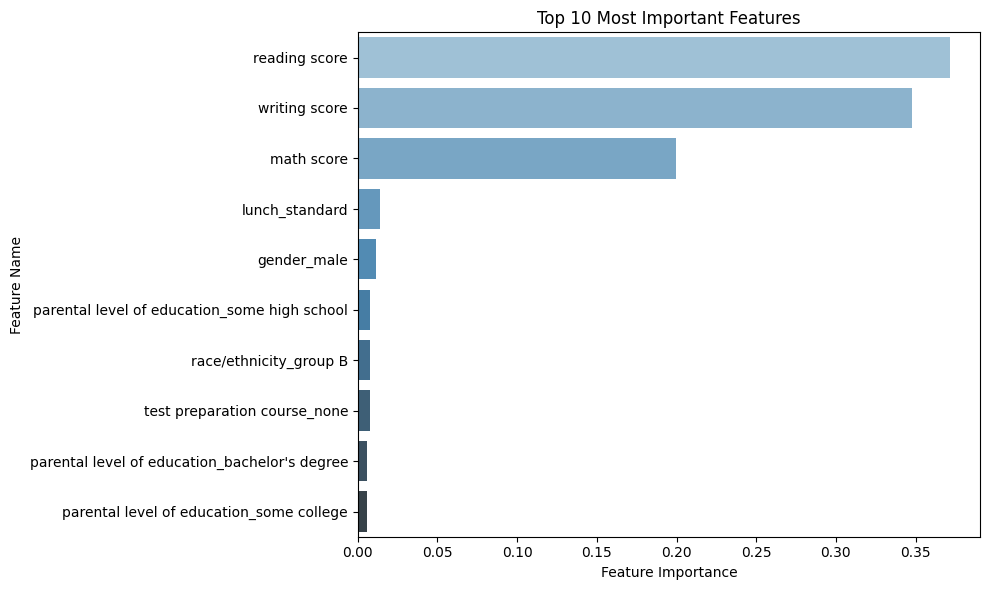

In [30]:
#Communicate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = model.best_estimator_.named_steps['randomforestclassifier'].feature_importances_

# Assuming you're using a pipeline and X_train is a DataFrame
feature_names = X_train.columns

# Create a DataFrame for plotting
feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot the top N important features
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importances.head(10), x='Importance', y='Feature', palette='Blues_d')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


In [31]:
#save the model
import pickle

# Save the model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)
